Task 2

1. Dataset Description
The dataset used in this project contains information about students who appeared in the final interview round of various companies during a placement/internship process. Each row corresponds to a company, and the second column contains a comma-separated list of students who appeared in that company's final round.

Nodes in the network represent students.

An undirected edge is created between two students if they both appeared in the final round of the same company.

The weight of an edge represents the number of companies for which the two students appeared together in the final round.

This network structure effectively captures collaborative or competitive interactions among students based on shared interview opportunities.

2. Network Construction Method
The raw CSV file was parsed such that:

For each company, the list of students was cleaned and split into individual names.

All unique pairs of students within each company were identified using combinations.

Each such pair was treated as an undirected edge in the graph.

If a student pair occurred in multiple companies' final rounds, the corresponding edge's weight was incremented accordingly.

This results in a weighted undirected graph, where:

High-weight edges indicate stronger associations (more shared companies).

Nodes with high degree or centrality may indicate highly sought-after or collaborative students.

3. Initial Observations
After constructing the network:

Total Nodes: 200 (unique students)

Total Edges: 2479 (student pairs who appeared together at least once)

The network was analyzed to visualize the degree distribution, which represents the number of connections (shared final round experiences) each student has.

A histogram was plotted using a logarithmic scale on the y-axis to better observe the distribution, especially for high-degree nodes. The plot revealed a skewed distribution, where:

Most students have a relatively small number of connections.

A few students are connected to many others, indicating that they appeared in final rounds with many different peers.

This behavior is typical in real-world social or interaction networks, where participation or influence tends to be unevenly distributed.



<ipython-input-6-23b60a2a75d7>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  company = row[0]
<ipython-input-6-23b60a2a75d7>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  raw_student_list = row[1]


Total Nodes: 200
Total Edges: 2479


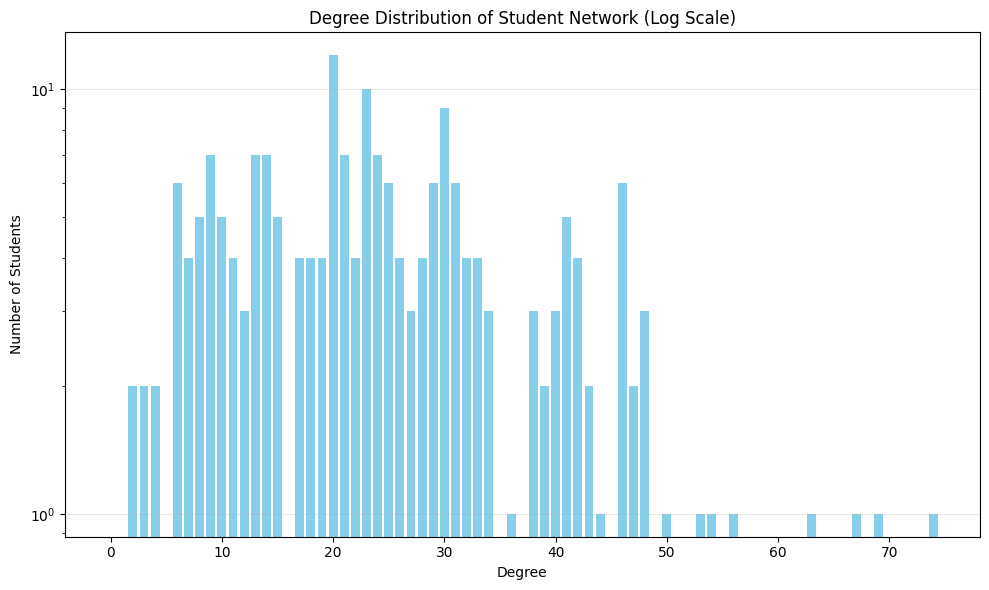

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import defaultdict

# Load the dataset
df = pd.read_csv("Final_Interview_Students_per_Company__Capped_at_15_.csv")

# Create the graph
G = nx.Graph()

# Dictionary to store edge weights
edge_weights = defaultdict(int)

# Iterate over each row to process companies and student lists
for idx, row in df.iterrows():
    company = row[0]
    raw_student_list = row[1]

    # Clean and split student names
    students = [s.strip() for s in raw_student_list.split(',') if s.strip()]

    # Add edges between all student pairs who appeared for the same company
    for s1, s2 in combinations(students, 2):
        edge = tuple(sorted((s1, s2)))
        edge_weights[edge] += 1

# Add edges and nodes to the graph
for (s1, s2), weight in edge_weights.items():
    G.add_edge(s1, s2, weight=weight)

print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")

# Degree distribution
degrees = [d for _, d in G.degree()]
degree_counts = np.bincount(degrees)
degree_vals = range(len(degree_counts))

# Plot degree distribution (log scale)
plt.figure(figsize=(10, 6))
plt.bar(degree_vals, degree_counts, color='skyblue')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Number of Students")
plt.title("Degree Distribution of Student Network (Log Scale)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Task 2


Top 10 nodes by Eigenvector Centrality:
DULAPALLI SRUJANA SRAVANTHI: 0.187488
SUDHEER VERMA: 0.172407
SAHIL DAS: 0.166367
KANUGULA TRIVENI: 0.153669
SHREYAS DHARMATTI: 0.149871
ADITYA NAMA: 0.129928
DEEPAK MEENA: 0.129594
ABHINAB MONDAL: 0.129474
BARDE VEDANT: 0.122687
RAHATAL SOHAM SUNIL: 0.119932


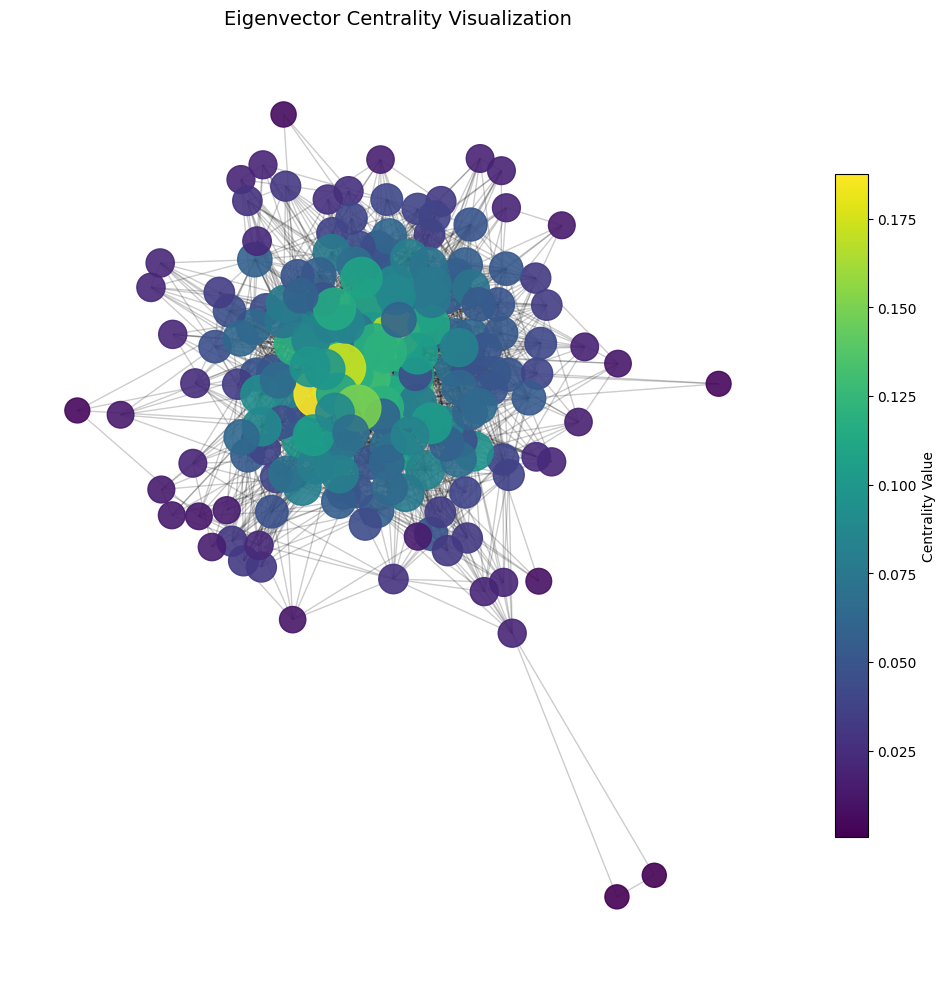

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Helper function for printing top N nodes
def display_top_nodes(centrality_dict, label, n=10):
    print(f"\nTop {n} nodes by {label}:")
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    for node, value in sorted_nodes:
        print(f"{node}: {value:.6f}")
    return sorted_nodes

# Helper function to plot centrality-based network
def plot_centrality(G, centrality_dict, title):
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize
    from matplotlib.cm import ScalarMappable

    norm = Normalize(vmin=min(centrality_dict.values()), vmax=max(centrality_dict.values()))
    node_sizes = [300 + 1000 * norm(v) for v in centrality_dict.values()]
    node_colors = [plt.cm.viridis(norm(v)) for v in centrality_dict.values()]
    pos = nx.spring_layout(G, seed=42)

    fig, ax = plt.subplots(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)

    # Create ScalarMappable for colorbar
    sm = ScalarMappable(norm=norm, cmap=plt.cm.viridis)
    sm.set_array([])  # Required for colorbar
    cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
    cbar.set_label('Centrality Value')

    ax.set_title(title, fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


# Eigenvector Centrality
eig_cent = nx.eigenvector_centrality(G, max_iter=1000)
top_eig = display_top_nodes(eig_cent, "Eigenvector Centrality")
plot_centrality(G, eig_cent, "Eigenvector Centrality Visualization")

# Katz Centrality
katz_cent = nx.katz_centrality(G, alpha=0.1, beta=1.0)
top_katz = display_top_nodes(katz_cent, "Katz Centrality")
plot_centrality(G, katz_cent, "Katz Centrality Visualization")

# Betweenness Centrality
btw_cent = nx.betweenness_centrality(G)
top_btw = display_top_nodes(btw_cent, "Betweenness Centrality")
plot_centrality(G, btw_cent, "Betweenness Centrality Visualization")

# Closeness Centrality (on largest component)
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc)
clo_cent = nx.closeness_centrality(G_lcc)
top_clo = display_top_nodes(clo_cent, "Closeness Centrality")
plot_centrality(G_lcc, clo_cent, "Closeness Centrality Visualization")

# HITS algorithm
hits_hub, hits_auth = nx.hits(G, max_iter=500)
top_hubs = display_top_nodes(hits_hub, "HITS - Hub Score")
top_auth = display_top_nodes(hits_auth, "HITS - Authority Score")
